In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file=open('/home/aragorn/Documents/course_work/PH 549/U00096.fna','r')
s=''
i=0
for x in file:
    if i==0:
        pass
    else:
        s=s+x[0:-1]
    i=1
file.close()

In [21]:
print(s[0:6]) ## Verifying that there's no stop codon at the very beginning. 

AGCTTT


In [3]:
stop=['TAG','TAA','TGA']
i=0
i1=0
i2=0
index=[[],[],[]]
while (i<len(s) and i1<len(s) and i2<len(s) and i1!=-1 and i2!=-1 and i!=-1):
    i=i+1 ## The verification in the above cell was done because of this --- I start from index 1 and not index 0.
    i1=i1+1
    i2=i2+1
    i=s.find(stop[0],i)
    if i==-1:
        pass
    else:
#         print(i%3)
#         print(index[i%3])
        index[i%3].append(i)
#     i=i+1
    i1=s.find(stop[1],i1)
    if i1==-1:
        pass
    else:
#         print(i%3)
#         print(index[i%3])
        index[i1%3].append(i1)
#     i1=i1+1
    i2=s.find(stop[2],i2)
    if i2==-1:
        pass
    else:
#         print(i%3)
#         print(index[i%3])
        index[i2%3].append(i2)
#     i2=i2+1


In [4]:
for i in range(3):
    index[i].sort()

In [7]:
L=[[],[],[]]
for i in range(3):
    for x in range(len(index[i])-1):
        L[i].append((index[i][x+1]-index[i][x])//3 - 1)


In [19]:
tail = lambda i: s[index[i][-1]:]+s[0:index[i][0]+3] ## The tail end.
TAIL = [tail(i) for i in range(3)]

In [22]:
# print(TAIL)
# for i in range(3):
#     s1=tail(i)
#     I=0
# stop=['TAG','TAA','TGA']
index1=[[0],[0],[0]] ## Since, I have included the start codon at the beginning in each. 
for j in range(3):
    i=0
    i1=0
    i2=0
    while (i<len(TAIL[j]) and i1<len(TAIL[j]) and i2<len(TAIL[j]) and i1!=-1 and i2!=-1 and i!=-1):
        i=i+1
        i1=i1+1
        i2=i2+1
        i=TAIL[j].find(stop[0],i)
        if i==-1:
            pass
        else:
    #         print(i%3)
    #         print(index[i%3])
            index1[j].append(i)
    #     i=i+1
        i1=TAIL[j].find(stop[1],i1)
        if i1==-1:
            pass
        else:
    #         print(i%3)
    #         print(index[i%3])
            index1[j].append(i1)
    #     i1=i1+1
        i2=TAIL[j].find(stop[2],i2)
        if i2==-1:
            pass
        else:
    #         print(i%3)
    #         print(index[i%3])
            index1[j].append(i2)
    #     i2=i2+1


In [24]:
for i in range(3):
    index1[i].sort()
# print(index1)

[[0, 51, 60, 63, 69, 90, 171, 188, 209, 251, 255, 266, 359, 368, 476, 515, 580, 592], [0, 3, 27, 60, 75, 78], [0, 40, 46, 65, 77, 80, 104, 137, 155]]


In [25]:
for i in range(3):
    for x in range(len(index1[i])-1):
        L[i].append((index1[i][x+1]-index1[i][x])//3 - 1)

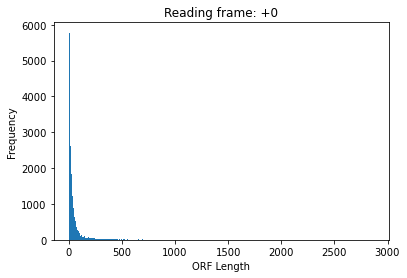

In [26]:
L=np.array(L) ## For an inline plot. (I recommend looking at the created PDFs)
fig,ax=plt.subplots(1)
for i in range(1):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    ax.hist(L[i],bins=b)
    ax.set(xlabel='ORF Length',ylabel='Frequency',title='Reading frame: +'+str(i))

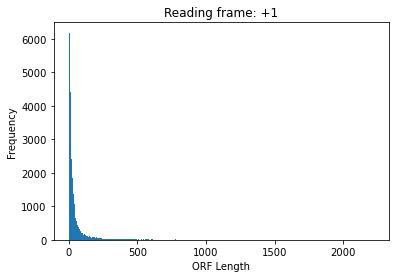

In [27]:
L=np.array(L) ## For an inline plot. (I recommend looking at the created PDFs)
fig,ax=plt.subplots(1)
for i in range(1,2):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    ax.hist(L[i],bins=b)
    ax.set(xlabel='ORF Length',ylabel='Frequency',title='Reading frame: +'+str(i))

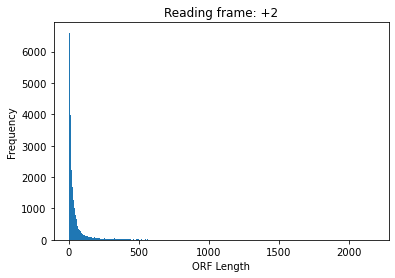

In [28]:
L=np.array(L) ## For an inline plot. (I recommend looking at the created PDFs)
fig,ax=plt.subplots(1)
for i in range(2,3):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    ax.hist(L[i],bins=b)
    ax.set(xlabel='ORF Length',ylabel='Frequency',title='Reading frame: +'+str(i))

In [29]:
# fig, ax = plt.subplots(3)
L=np.array(L)
for i in range(3):
    iqr = stats.iqr(L[i], interpolation = 'midpoint')
    l=np.max(L[i])-np.min(L[i])
    b=int(np.floor((l**(4/3))/2/iqr))
    plt.hist(L[i],bins=b)
    plt.xlabel('ORF Length')
    plt.ylabel('Frequency')
    plt.title('Reading frame: +'+str(i))
    plt.savefig('q5f'+str(i)+'.pdf')
    plt.close()
